In [20]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.fft import fft, fftfreq
from math import pi
from scipy import stats 

In [21]:
N = 1000
dx = 0.001

seed = 2022
np.random.seed(seed)

x = np.linspace(-N/2*dx, (N/2-1)*dx, N, endpoint=False)
x = np.reshape(x, (N, 1))
print(np.shape(x))
b1,b2,b3 = np.random.uniform(0,2*pi,3)
# y = np.exp(-x**2)
# y = np.sin(2*pi*x) + 2*np.sin(10*2*pi*x) + 3*np.sin(20*2*pi*x) + 4*np.sin(30*2*pi*x)
y = np.sin(x) + np.sin(10*x+b1) + np.sin(20*x+b2) + np.sin(30*x+b3)
y = np.reshape(y, (N, 1))

(1000, 1)


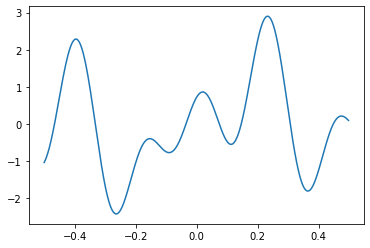

In [22]:
plt.plot(x, y)
plt.show()

In [56]:
# calculate f_p

px = 1/2/pi
# px = stats.norm.pdf(x, loc=0, scale=1) # write the  function 
# print(len(px))
# plt.plot(x, px)

fp = np.sqrt(px) * (y - np.mean(y))
# f_mean = np.sum(px * y * dx)
# fp = np.sqrt(px) * (y - f_mean)

In [57]:
# method 1: Fourier transform 

1000


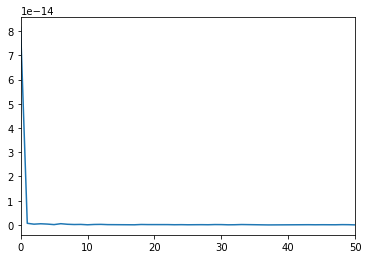

In [58]:
# discrete fourier transform 

def fft1(gn):
    N = len(gn)
    t = np.linspace(0, 1.0, N)
    k = np.linspace(-N/2, N/2-1, N)
    f = np.arange(N, dtype=complex)
    
    for index in k:
        index = int(index)
        f[index]=complex(np.sum(np.cos(2*np.pi*index*t)*gn), -np.sum(np.sin(2*np.pi*index*t)*gn))
    return f

yf1 = fft1(fp)
print(len(yf1))
xf = fftfreq(N,dx)[:N//2]

plt.plot(xf, 2.0/N * np.abs(yf1[0:N//2]))
plt.xlim(0,50)
plt.show()

1000


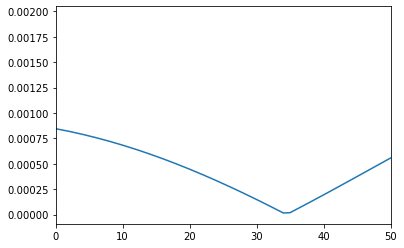

In [59]:
# fast Fourier transform

yf = fft(fp)
print(len(yf))

plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.xlim(0,50)
plt.show()

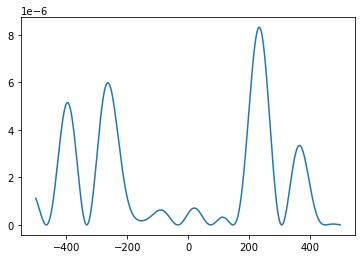

In [60]:
# the minimization function 

dw = 2*pi/N/dx 
K = np.linspace(-N/2, N/2-1, N)
K = np.reshape(K, (N, 1))
# print(len(K))
exp_k = np.array(np.zeros(N), dtype = complex)

for i in range(len(K)-1): 
    # print(K[i])
    exp_k[i] = complex(np.cos(K[i]*pi), -np.sin(K[i]*pi))
    # print(Fp)
    
yf = np.reshape(yf, (N,1))
exp_k = np.reshape(exp_k, (N,1))
f2 = np.abs(yf * exp_k * dx)**2 * dw

plt.plot(K,f2)
plt.show()

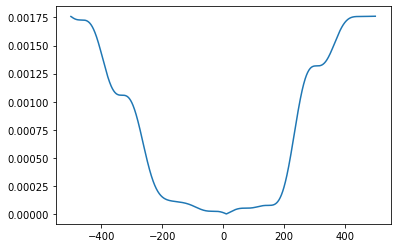

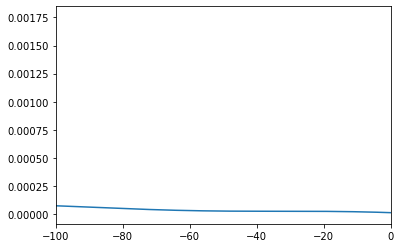

In [61]:
def func(k): 
    k = int(k + N/2) 
    if k==0: 
        low = f2[0]
        high = sum(f2[1:N-1])
    elif k==N-1:
        low = sum(f2[0:N-1])
        high = 0 
    else:
        low = sum(f2[0:k])
        high = sum(f2[k+1:N-1])
    f = np.abs(low-high)
    return f

n0 = np.linspace(1, N, N)
f0 = np.zeros(N)
for k in K:
    i = k + N/2
    i = int(i)
    f0[i] = func(k)

plt.plot(K, f0)
plt.show()

plt.plot(K, f0)
plt.xlim(-100,0)
plt.show()


In [62]:
# calculate the cut-off w0

f_min = min(f0)
print(f_min)

w0 = np.argmin(f0) - N/2
print(w0)

2.692691301389716e-07
10.0


In [63]:
with open('my_x_data.npy', 'wb') as fs:
    np.save(fs, x)

with open('my_x_data.npy', 'rb') as fs:
    x = np.load(fs)

In [64]:
import tensorflow as tf 
from tensorflow import keras 

In [65]:
# training the function with NN 

seed = 2022 
np.random.seed(seed)
# random sample from U(-pi,pi)
x_train = np.random.uniform(-pi,pi,512)
# x_train = np.random.normal(0, 1, 1000)
y_train = np.sin(x_train) + np.sin(10*x_train+b1) + np.sin(20*x_train+b2) + np.sin(30*x_train+b3)
# y_train = np.sin(2*pi*x_train) + 2*np.sin(10*2*pi*x_train) + 3*np.sin(20*2*pi*x_train) + 4*np.sin(30*2*pi*x_train)

# reshaping 
x_train = x_train.reshape((len(x_train), 1))
# print(len(x_train))
y_train = y_train.reshape((len(y_train), 1))
# print(len(y_train))

In [66]:
# define the keras model 
K = 64
input_layer = keras.Input(shape = (1, ))
hidden_layer_1 = keras.layers.Dense(units = K, 
                                    activation = 'sigmoid')
hidden_layer_2 = keras.layers.Dense(units = K, 
                                    activation = 'sigmoid')
hidden_layer_3 = keras.layers.Dense(units = K, 
                                    activation = 'sigmoid')
hidden_layer_4 = keras.layers.Dense(units = K, 
                                    activation = 'sigmoid')
hidden_layer_5 = keras.layers.Dense(units = K, 
                                    activation = 'sigmoid')
output_layer = keras.layers.Dense(units = 1, 
                                    use_bias = False)
model = keras.Sequential([input_layer, hidden_layer_1,
                          hidden_layer_2, hidden_layer_3, 
                          hidden_layer_4, hidden_layer_5, 
                          output_layer])

# compling the model 
adam = keras.optimizers.Adam(learning_rate=0.0005)
model.compile(optimizer = 'adam', loss = 'mse')

In [67]:
def SB_epoch(n_epoch): 
    # fitting the data 
    tf.random.set_seed(seed)
    beta = model.fit(x_train, y_train, epochs=n_epoch, batch_size=32)

    # predicting the data
    predict_1 = model.predict(x)
    # print(np.shape(predict_1))

    # compute r
    predict_1 = np.reshape(predict_1, (N,1))
    r = y - predict_1
    # print(np.shape(r))

    plt.plot(x, y, color='black')
    plt.plot(x, predict_1, color='green')
    plt.plot(x, r, color='red')
    plt.show()

    # calculate r_p
    r_mean = r - np.mean(r)
    r_mean = np.reshape(r_mean, (N, 1))
    rp = np.sqrt(px) * r_mean
    # print(np.shape(rp))

    # Fourier transform 
    rf = fft(rp)
    rf = np.reshape(rf, (N, 1))

    # compute sum_low
    r2 = np.abs(rf * exp_k * dx)**2 * dw
    r_sum_low = sum(r2[0:int(w0 + N/2)])
    # print(r_sum_low)

    # compute SB
    a = r_sum_low
    b = sum(f2)
    e_low = a/b 
    # print(e_low)

    var_r = np.var(r)
    var_f = np.var(y)
    FVU = var_r/var_f 
    # print(FVU)
    SB = (FVU - 2*e_low)/FVU
    print(SB)
    return SB

Epoch 1/20
16/16 [==============================] - 0s 837us/step - loss: 2.5032
Epoch 2/20
16/16 [==============================] - 0s 763us/step - loss: 2.0660
Epoch 3/20
16/16 [==============================] - 0s 730us/step - loss: 2.0036
Epoch 4/20
16/16 [==============================] - 0s 767us/step - loss: 2.0040
Epoch 5/20
16/16 [==============================] - 0s 812us/step - loss: 2.0014
Epoch 6/20
16/16 [==============================] - 0s 772us/step - loss: 2.0015
Epoch 7/20
16/16 [==============================] - 0s 776us/step - loss: 2.0121
Epoch 8/20
16/16 [==============================] - 0s 721us/step - loss: 1.9985
Epoch 9/20
16/16 [==============================] - 0s 667us/step - loss: 1.9914
Epoch 10/20
16/16 [==============================] - 0s 743us/step - loss: 1.9851
Epoch 11/20
16/16 [==============================] - 0s 800us/step - loss: 1.9678
Epoch 12/20
16/16 [==============================] - 0s 656us/step - loss: 1.9591
Epoch 13/20
16/16 [======

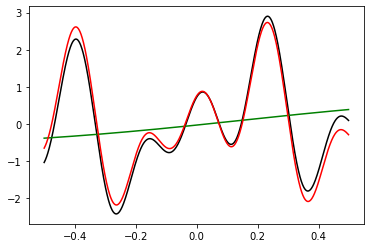

[0.0070015]
Epoch 1/100
16/16 [==============================] - 0s 756us/step - loss: 1.5769
Epoch 2/100
16/16 [==============================] - 0s 718us/step - loss: 1.5661
Epoch 3/100
16/16 [==============================] - 0s 659us/step - loss: 1.5615
Epoch 4/100
16/16 [==============================] - 0s 739us/step - loss: 1.5654
Epoch 5/100
16/16 [==============================] - 0s 655us/step - loss: 1.5550
Epoch 6/100
16/16 [==============================] - 0s 701us/step - loss: 1.5548
Epoch 7/100
16/16 [==============================] - 0s 800us/step - loss: 1.5703
Epoch 8/100
16/16 [==============================] - 0s 855us/step - loss: 1.5581
Epoch 9/100
16/16 [==============================] - 0s 686us/step - loss: 1.5465
Epoch 10/100
16/16 [==============================] - 0s 711us/step - loss: 1.5430
Epoch 11/100
16/16 [==============================] - 0s 810us/step - loss: 1.5382
Epoch 12/100
16/16 [==============================] - 0s 787us/step - loss: 1.5428
E

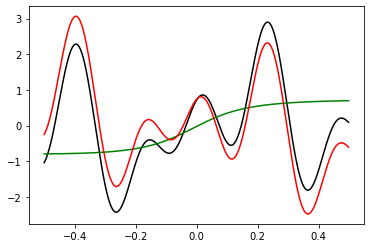

[0.00890178]
Epoch 1/500
16/16 [==============================] - 0s 849us/step - loss: 1.5042
Epoch 2/500
16/16 [==============================] - 0s 686us/step - loss: 1.5090
Epoch 3/500
16/16 [==============================] - 0s 630us/step - loss: 1.5103
Epoch 4/500
16/16 [==============================] - 0s 736us/step - loss: 1.5082
Epoch 5/500
16/16 [==============================] - 0s 651us/step - loss: 1.5055
Epoch 6/500
16/16 [==============================] - 0s 589us/step - loss: 1.5066
Epoch 7/500
16/16 [==============================] - 0s 653us/step - loss: 1.5179
Epoch 8/500
16/16 [==============================] - 0s 649us/step - loss: 1.5092
Epoch 9/500
16/16 [==============================] - 0s 606us/step - loss: 1.5052
Epoch 10/500
16/16 [==============================] - 0s 673us/step - loss: 1.5025
Epoch 11/500
16/16 [==============================] - 0s 640us/step - loss: 1.4969
Epoch 12/500
16/16 [==============================] - 0s 634us/step - loss: 1.5036


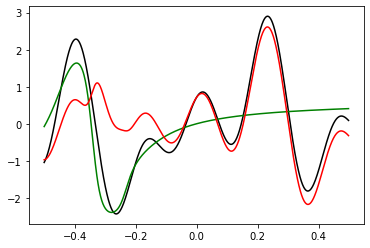

[0.75824398]
Epoch 1/1000
16/16 [==============================] - 0s 833us/step - loss: 1.3155
Epoch 2/1000
16/16 [==============================] - 0s 810us/step - loss: 1.2967
Epoch 3/1000
16/16 [==============================] - 0s 709us/step - loss: 1.2945
Epoch 4/1000
16/16 [==============================] - 0s 715us/step - loss: 1.3027
Epoch 5/1000
16/16 [==============================] - 0s 764us/step - loss: 1.3102
Epoch 6/1000
16/16 [==============================] - 0s 767us/step - loss: 1.3009
Epoch 7/1000
16/16 [==============================] - 0s 756us/step - loss: 1.3125
Epoch 8/1000
16/16 [==============================] - 0s 849us/step - loss: 1.3036
Epoch 9/1000
16/16 [==============================] - 0s 768us/step - loss: 1.3057
Epoch 10/1000
16/16 [==============================] - 0s 845us/step - loss: 1.2918
Epoch 11/1000
16/16 [==============================] - 0s 804us/step - loss: 1.2874
Epoch 12/1000
16/16 [==============================] - 0s 812us/step - l

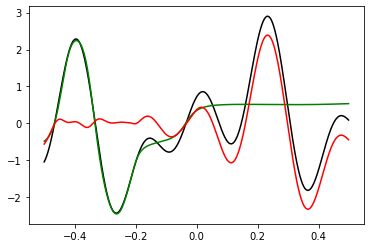

[0.95386862]
Epoch 1/2000
16/16 [==============================] - 0s 896us/step - loss: 1.2228
Epoch 2/2000
16/16 [==============================] - 0s 815us/step - loss: 1.2248
Epoch 3/2000
16/16 [==============================] - 0s 822us/step - loss: 1.2236
Epoch 4/2000
16/16 [==============================] - 0s 888us/step - loss: 1.2234
Epoch 5/2000
16/16 [==============================] - 0s 766us/step - loss: 1.2246
Epoch 6/2000
16/16 [==============================] - 0s 721us/step - loss: 1.2216
Epoch 7/2000
16/16 [==============================] - 0s 819us/step - loss: 1.2385
Epoch 8/2000
16/16 [==============================] - 0s 780us/step - loss: 1.2251
Epoch 9/2000
16/16 [==============================] - 0s 768us/step - loss: 1.2232
Epoch 10/2000
16/16 [==============================] - 0s 802us/step - loss: 1.2192
Epoch 11/2000
16/16 [==============================] - 0s 822us/step - loss: 1.2130
Epoch 12/2000
16/16 [==============================] - 0s 822us/step - l

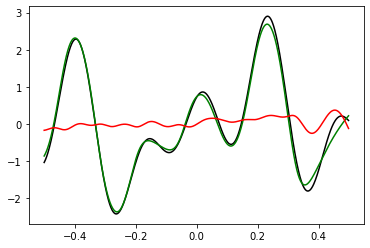

[0.46687512]
Epoch 1/3000
16/16 [==============================] - 0s 733us/step - loss: 0.7269
Epoch 2/3000
16/16 [==============================] - 0s 766us/step - loss: 0.7308
Epoch 3/3000
16/16 [==============================] - 0s 692us/step - loss: 0.7404
Epoch 4/3000
16/16 [==============================] - 0s 718us/step - loss: 0.7386
Epoch 5/3000
16/16 [==============================] - 0s 640us/step - loss: 0.7459
Epoch 6/3000
16/16 [==============================] - 0s 668us/step - loss: 0.7465
Epoch 7/3000
16/16 [==============================] - 0s 695us/step - loss: 0.7598
Epoch 8/3000
16/16 [==============================] - 0s 708us/step - loss: 0.7449
Epoch 9/3000
16/16 [==============================] - 0s 719us/step - loss: 0.7611
Epoch 10/3000
16/16 [==============================] - 0s 681us/step - loss: 0.7384
Epoch 11/3000
16/16 [==============================] - 0s 718us/step - loss: 0.7656
Epoch 12/3000
16/16 [==============================] - 0s 711us/step - l

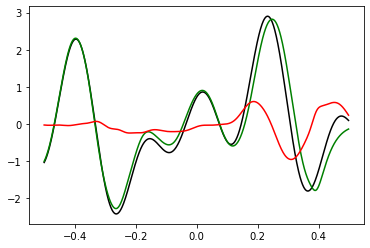

[0.87753736]
Epoch 1/4000
16/16 [==============================] - 0s 996us/step - loss: 0.3588
Epoch 2/4000
16/16 [==============================] - 0s 876us/step - loss: 0.3474
Epoch 3/4000
16/16 [==============================] - 0s 998us/step - loss: 0.3407
Epoch 4/4000
16/16 [==============================] - 0s 917us/step - loss: 0.3350
Epoch 5/4000
16/16 [==============================] - 0s 927us/step - loss: 0.3351
Epoch 6/4000
16/16 [==============================] - 0s 999us/step - loss: 0.3447
Epoch 7/4000
16/16 [==============================] - 0s 769us/step - loss: 0.3740
Epoch 8/4000
16/16 [==============================] - 0s 953us/step - loss: 0.3607
Epoch 9/4000
16/16 [==============================] - 0s 893us/step - loss: 0.3574
Epoch 10/4000
16/16 [==============================] - 0s 969us/step - loss: 0.3320
Epoch 11/4000
16/16 [==============================] - 0s 812us/step - loss: 0.3310
Epoch 12/4000
16/16 [==============================] - 0s 853us/step - l

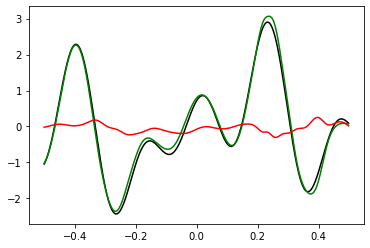

[0.08080961]


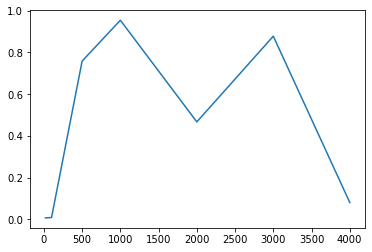

In [68]:
epoch_list = np.array([20, 100, 500, 1000, 2000, 3000, 4000], dtype='int')

i=0
SB_list = np.zeros(7)
for epoch in epoch_list: 
    SB_list[i] = SB_epoch(epoch)
    i = i+1

plt.plot(epoch_list, SB_list)